**Exercise 7.31**.  Simulate a time series of length $n = 48$ from an AR(1) model with $\phi = 0.7$. Use that series as if it were real data.  Now compare the theoretical asymptotic distribution of the estimator of $\phi$ with the distribution of the bootstrap estimator of $\phi$.

**Solution**.

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from tqdm import tqdm_notebook
import warnings

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def generate_arima(phi=[], d=0, theta=[], n=100, distrvs=None):
    """
    Generates an ARIMA distribution with specified phi, d, and theta parameters,
    using the optimally provided random function generator.
    """
    
    ar = np.r_[1, -np.array(phi)]
    ma = np.r_[1, -np.array(theta)]
    Y = ArmaProcess(ar, ma).generate_sample(nsample=n, distrvs=distrvs)
    for i in range(d):
        Y = np.cumsum(Y)
    return Y

**(a)**

In [3]:
np.random.seed(0)
Y = generate_arima(phi=[0.7], n=48)
fitted_model = ARIMA(Y, order=(1, 0, 0)).fit(method='mle')
print(fitted_model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   48
Model:                     ARMA(1, 0)   Log Likelihood                 -73.054
Method:                           mle   S.D. of innovations              1.100
Date:                Mon, 11 May 2020   AIC                            152.108
Time:                        19:30:49   BIC                            157.721
Sample:                             0   HQIC                           154.229
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6383      0.542      1.178      0.239      -0.423       1.700
ar.L1.y        0.7215      0.097      7.449      0.000       0.532       0.911
                                    Roots           

In [4]:
B = 10000

phi_hat = fitted_model.arparams
estimates = np.empty(B)

np.random.seed(1)
n = len(Y)

# Filter out MLE convergence warnings, 
# as in https://www.statsmodels.org/stable/examples/notebooks/generated/mixed_lm_example.html
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    for i in tqdm_notebook(range(B), 'Estimate'):
        Yb = generate_arima(phi=phi_hat, n=n)
        estimates[i] = ARIMA(Yb, order=(1, 0, 0)).fit(method='mle').arparams[0]

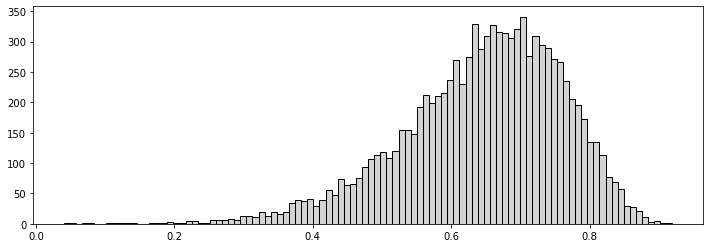

In [5]:
plt.figure(figsize=(12, 4))
plt.hist(estimates, bins=100, edgecolor='black', color='lightgrey')
plt.show()

In [6]:
print('Bootstrap estimate mean: %.3f' % estimates.mean())
print('Bootstrap estimate SE:\t %.3f' % estimates.std())
print('5%% percentile:\t\t %.3f' % (np.percentile(estimates, 5)))
print('95%% percentile:\t\t %.3f' % (np.percentile(estimates, 95)))

Bootstrap estimate mean: 0.645
Bootstrap estimate SE:	 0.116
5% percentile:		 0.433
95% percentile:		 0.808


The bootstrap confidence standard error is 0.116, a bit over the ARMA fitted confidence of 0.097.

**Exercise 7.32**.  The industrial color property time series was fitted quite well by an AR(1) model.  However, the series is rather short, with $n = 35$. Compare the theoretical asymptotic distribution of the estimator of φ with the distribution of the bootstrap estimator of $\phi$. The data are in the file named `color`.

**Solution**.

In [7]:
Y = pd.read_csv('../data/color.dat')[['color']]

In [8]:
fitted_model = ARIMA(Y, order=(1, 0, 0)).fit(method='mle')
print(fitted_model.summary())

                              ARMA Model Results                              
Dep. Variable:                  color   No. Observations:                   35
Model:                     ARMA(1, 0)   Log Likelihood                -106.074
Method:                           mle   S.D. of innovations              4.983
Date:                Mon, 11 May 2020   AIC                            218.147
Time:                        19:32:38   BIC                            222.813
Sample:                             0   HQIC                           219.758
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          74.3293      1.915     38.813      0.000      70.576      78.083
ar.L1.color     0.5705      0.144      3.975      0.000       0.289       0.852
                                    Roots       

In [9]:
B = 10000

phi_hat = fitted_model.arparams
estimates = np.empty(B)

np.random.seed(1)
n = len(Y)

# Filter out MLE convergence warnings, 
# as in https://www.statsmodels.org/stable/examples/notebooks/generated/mixed_lm_example.html
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    for i in tqdm_notebook(range(B), 'Estimate'):
        Yb = generate_arima(phi=phi_hat, n=n)
        estimates[i] = ARIMA(Yb, order=(1, 0, 0)).fit(method='mle').arparams[0]

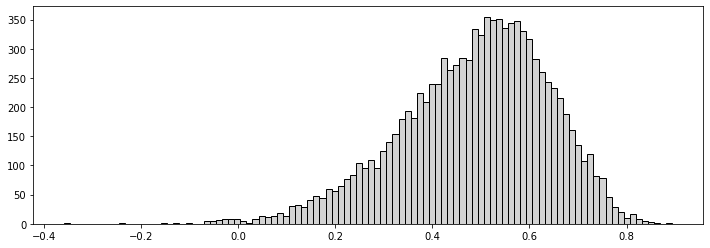

In [10]:
plt.figure(figsize=(12, 4))
plt.hist(estimates, bins=100, edgecolor='black', color='lightgrey')
plt.show()

In [11]:
print('Bootstrap estimate mean: %.3f' % estimates.mean())
print('Bootstrap estimate SE:\t %.3f' % estimates.std())
print('5%% percentile:\t\t %.3f' % (np.percentile(estimates, 5)))
print('95%% percentile:\t\t %.3f' % (np.percentile(estimates, 95)))

Bootstrap estimate mean: 0.487
Bootstrap estimate SE:	 0.152
5% percentile:		 0.213
95% percentile:		 0.710


The bootstrap estimate has a standard error of 0.152, a bit above the original model fit standard error if 0.144.